In [4]:
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

import time

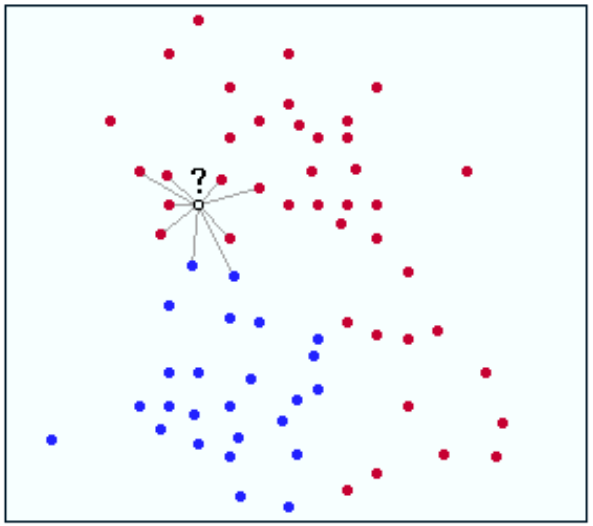

In [2]:
from IPython.display import Image
path = "ref_img/img_01.png"
Image(filename=path, width=500)

# sklearn 에서 MNIST  Full DataSet 얻어서 하기 
* 참고) 인터넷에서 간략하게 데이터를 얻어서 할 수 있으나, 데이터의 양이 적음. 물론 적은 시간 동안에 알고리즘 확인을 위해서는 간략한 데이터로 받아서 하고, 전체에 대해서 하고 싶으면 전체를 얻어서 할 것!
* 참고) http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py

* Full Version : 필요한 패키지 : fetch_mldata
* 데이터의 구성이 .data, .target 이렇게 되어 있으며, 전체 데이터에 대해서 하는 것이기 때문에 Kaggle과 달리 직접 train/ test를 나누어야 한다. 
> from sklearn.cross_validation import train_test_split

In [5]:
# 머신러닝을 하는 가장 대표적인 패키지인 scikit-learn 불러오기
import sklearn

# 평가를 위한 부분
from sklearn import metrics
# 데이터를 학습용과 검증용으로 나누는 모듈
from sklearn.model_selection import train_test_split

# mnist 라는 데이터를 받아오기
from sklearn.datasets import fetch_openml

In [6]:
mnist = fetch_openml("mnist_784",version=1,as_frame=False)
mnist #딕셔너리형


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [7]:
# 데이터 나누기..
# 모의고사 문제, 실전문제, 모의고사 정답지, 실전문제 정답지

(train_data, test_data, train_labels, test_labels) = train_test_split(
    np.array(mnist.data),
    mnist.target,
    test_size = 0.25,
    random_state=1234
)
print(len(train_data))
print(len(test_data))

52500
17500


In [9]:
mnist["target"]

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [10]:
mnist['data'].shape

(70000, 784)

In [ ]:
# 7만개의 문제와 정답지들 0--->
# 모의고사 문제 : 52500개
# 모의고사 정답 : 52500개
# 실전 문제 :   17500개
# 실전 정답 : 17500개

# 0~9까지 데이터가 다 들어있는지 확인!
* 실제로 우리가 학습 시킬 데이터가 0~9까지 다 제대로 들어있는 데이터인지 확인

In [7]:
# 10지선다의 문제가 되는 것임
# 10개의 종류에 대한 분류문제임
np.unique(train_labels)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


# 학습 시키려는 데이터의 분포가 균일하게 적당히 분포가 되었는지 확인!!!!
[[  0.00000000e+00   5.16600000e+03]
 [  1.00000000e+00   5.89400000e+03]
 [  2.00000000e+00   5.28200000e+03]
 [  3.00000000e+00   5.28000000e+03]
 [  4.00000000e+00   5.13100000e+03]
 [  5.00000000e+00   4.74300000e+03]
 [  6.00000000e+00   5.17100000e+03]
 [  7.00000000e+00   5.50200000e+03]
 [  8.00000000e+00   5.15400000e+03]
 [  9.00000000e+00   5.17700000e+03]]

 * 위와 같은 결과가 나오는지 확인!!!(단, 방법은 여러가지임!)
 * 대략 결과를 보면 각 숫자별로 약 5000개 내외의 이미지가 할당되어있다!!!!

In [14]:
unique,counts = np.unique(train_labels,return_counts=True)
print(np.asarray((unique,counts)).T)

[['0' 5247]
 ['1' 5866]
 ['2' 5235]
 ['3' 5351]
 ['4' 5081]
 ['5' 4743]
 ['6' 5199]
 ['7' 5476]
 ['8' 5148]
 ['9' 5154]]


In [9]:
# 비율로 계산
# 우리가 관심을 가지는 최종 타겟이 여러개인데
# 그 여러개의 분포가 대략 엇비슷하게 균일하게 분포하고 있다
print(np.asarray((unique,counts/len(train_labels))).T)

[['0' 0.09994285714285714]
 ['1' 0.11173333333333334]
 ['2' 0.09971428571428571]
 ['3' 0.10192380952380953]
 ['4' 0.09678095238095238]
 ['5' 0.09034285714285714]
 ['6' 0.09902857142857142]
 ['7' 0.1043047619047619]
 ['8' 0.09805714285714286]
 ['9' 0.09817142857142858]]


# 실제 데이터 값을 이미지로 확인해보자!
* ref) http://yann.lecun.com/exdb/mnist/
* 위의 사이트에 들어가서 실제 데이터의 구성을 확인해보자!!! 실제 내용을 보면 원래 데이터는 28 X 28 크기의 이미지로 이루어진 것을 알 수 있다. 다만, 우리가 받아들이고, 데이터화 하는 과정에서 label이 부여되었고, 처리를 위해서 matrix가 아닌 28x28 크기의 1차원 어레이로 처리가 된 것을 볼 수 있다.

* 시각화 부분 : http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [15]:
import seaborn as sns

In [16]:
# 이미 앞에서 label은 분리하였으니, 순수 데이터에서 크기 부분을 확인하자!!!
train_data[0].shape

(784,)

In [17]:
np.sqrt(train_data[0].shape[0])

28.0

<AxesSubplot:>

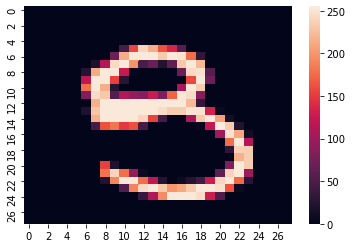

In [18]:
# 몇 번째 데이터를 시각화를 해서 볼 지 인덱스...
idx = 0
image_data = train_data[idx]

# 1차원 -> 2차원으로 
tot_size = image_data.shape[0] # 784
one_size = int(np.sqrt(tot_size)) # root 784 --> 28

# 이것을 바탕으로 시각화 -> 1차원 784 --> 2차원 28 by 28로 변환 : np.resahpe
sns.heatmap(np.reshape(image_data, (one_size, one_size)) )


Text(0.5, 1.0, 'MNIST Digit Image _ Train Data Number : 0')

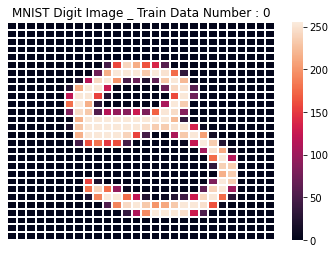

In [14]:
sns.heatmap(np.reshape(image_data, (one_size, one_size)), linewidth=0.1, xticklabels=False, yticklabels=False)
plt.title(str("MNIST Digit Image _ Train Data Number : ")+str(idx))

Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

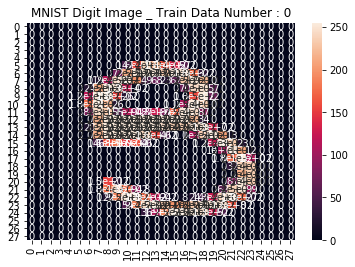

In [19]:
# 데이터의 실제 값을 보고 싶을 때!!!
sns.heatmap(np.reshape(image_data, (one_size, one_size)), linewidth=0, xticklabels=True, yticklabels=True, annot=True)
plt.title(str("MNIST Digit Image _ Train Data Number : ")+str(idx))

Text(0.5, 1, 'MNIST Digit Image _ Train Data Number : 0')

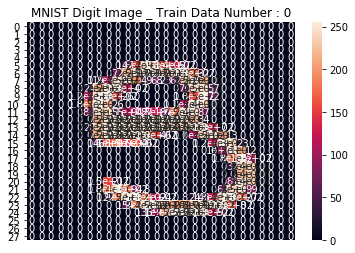

In [20]:
# 참고) xticklabels, yticklabels 중에서 하나라도 F 이면 annot 기능이 활성화 되지 않는다;;;
sns.heatmap(np.reshape(image_data, (one_size, one_size)), linewidth=0, xticklabels=False, yticklabels=True, annot=True)
plt.title(str("MNIST Digit Image _ Train Data Number : ")+str(idx))

# Normalization - Max/min method
* new x = (x - x_min) / (x_max - x_min)
> from sklearn.preprocessing import MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler


In [23]:
# 사이킷트 런은 기본 과정이 뭔가 룰을 찾는 것. 이를 fit 이라 함
# 그 룰대로 변환하는 것을 transform
# 룰대로 예측하는 것을 predict

# 준비
min_max_scaler = MinMaxScaler()
# 주어진 데이터를 기반으로 룰을 잡고, 변환하기. fit_trainsform
train_norm = min_max_scaler.fit_transform(train_data)
test_norm = min_max_scaler.fit_transform(test_data)

# 이미지 데이터 --> 5000장 정도. min=0,max = 255
# ---> 간단하게 하기 위해서 각기 기준을 잡고, 각기 기준대로 변환을 함!!!!


# 기본 분석 시작
* 참고로 데이터의 수가 많기 때문에 한 번 수행하는데 시간이 상당히 소요되니, 시간에 대한 부분을 잘 생각을 할 것!!!
* 참고) n_jobs : int, optional (default = 1)
 > The number of parallel jobs to run for neighbors search. If -1, then the number of jobs is set to the number of CPU cores. Doesn’t affect fit method.


In [16]:
# 주어진 데이터를 분류할 모델 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모델이 잘 분류되었는지 정확도의 관점에서 평가하기
from sklearn.metrics import accuracy_score
# 한번에 학습하기. 그러니 여러번 모의고사 실전을 자체 테스트 하기 위해서
from sklearn.model_selection import cross_val_score
import time


In [26]:
# scikit learn 은 기본이 cpu를 기반으로함
# GPU 같은 완전 병렬 처리를 지원 하지는 않음
# core 를 기반으로 병렬은 지원을 함
# n_jobs = -1 컴퓨터 cpu의 코어를 전부 쓰겟다
t1 = time.time()

# 사용할 모델을 불러오기 -> 나랑 가까운 3명을 기준으로 하는 모델 설정
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# 학습은 데이터를 넣어주기...-> train 모의고사 문제와 정답을 밀어줘기...-> 학습
# ----> knn모델의 파라미터의 최적화.....(knn 단순 계산이....instance model)
knn.fit(train_data, train_labels)


# 학습이 되면, 그 학습된 것을 바탕으로 실전 풀어보기 -> 실전문제 필요
# 실전 문제에 대한 정답지, omr 카드 등
pred = knn.predict(test_data)

t2 = time.time()
print("Process Time:" + str(t2-t1))

# 실전 문제에서 잘 했는지 평가 -> 모범정답, 내가 생각한 정답
print(accuracy_score(test_labels,pred))

# k:3 0.9732571428571428
# k:5
# k:9

Process Time:28.912989139556885
0.9713714285714286


1: 0.970057142857143
3: 0.9701142857142857
5: 0.9690666666666667
7: 0.9681333333333335
9: 0.9668571428571429
11: 0.965447619047619
13: 0.9641523809523811
15: 0.9631619047619047
17: 0.9620571428571427
19: 0.9606285714285715
21: 0.9593142857142858
23: 0.9587238095238095
25: 0.9576
27: 0.9565714285714286
29: 0.9559428571428572
31: 0.9549714285714286
33: 0.9540761904761904
35: 0.9533714285714285
37: 0.9525333333333332
39: 0.9517714285714286
41: 0.9507238095238095
43: 0.9499619047619048
45: 0.9492571428571429
47: 0.949009523809524
49: 0.9482666666666667
최적의 k :3


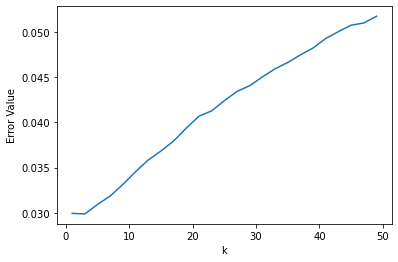

Process Time  :1657.7432537078857


In [32]:
t1 = time.time()

# 우리가 테스트할 k값들을 만들자
my_list = list(range(1,50))
neighbors = list(filter(lambda x : x % 2 !=0, my_list))

# k 값에 따라 여러번 반복한 모의고사 실전점수를 담을 리스트
cv_scores=[]

# k값에 따라서 학습하고 단, cv를 통해 여러번 (여기서는 10번 나눠서 한 부분)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)# k 값에 따른 모델 준비
    scores = cross_val_score(knn,train_data,train_labels,cv=10, scoring="accuracy")
    cv_scores.append(scores.mean())
    print(str(k)+":",scores.mean())
    
# 정확도 97% --> 에러의 관점으로 3% --> 100-97
# K값에 따라서 정확도
MSE = [1-x for x in cv_scores]

# 최적의 k 값은 언제? 에러의 관점으로는 에러가 제일 작을 때의 k가 좋음
optimal_k = neighbors[MSE.index(min(MSE))] 
print("최적의 k :"+str(optimal_k))

# k값에 따라서 에러에 대한 평균을 그래프로
plt.plot(neighbors, MSE)# 가로는 k값, 세로는 k일때 에러의 평균값.
plt.xlabel("k")
plt.ylabel("Error Value")
plt.show()

t2 = time.time()
print("Process Time  :" + str(t2-t1))


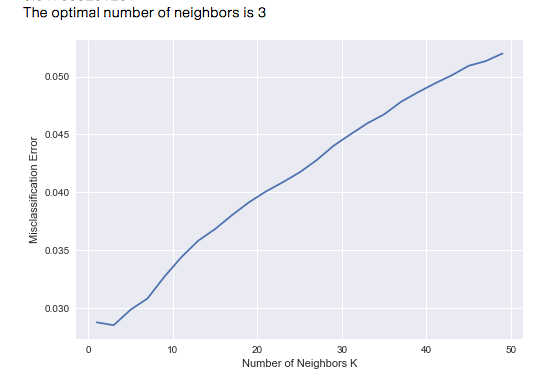

In [21]:
img_path = u"ref_img/MNIST_k_simulation.png"
from IPython.display import Image
Image(filename=img_path) 

# with PCA

In [1]:
from sklearn.decomposition import PCA
# Scikit Learn이라고 많이 하는데 파이썬에서 부를때는 sklearn요러케
# 모델로 생각해서 주어진 데이터에 대해서 fit함.

In [2]:
# 784개의 특징 중에서 PCA관점에서 제일 중요하다고 or 변동폭이 큰
# 순서대로 서열을 정했을 때, 최대 40개의 성분만 찾아보겠다.
num_comp=40
# knn(k=3) 과 같은 과정.
pca = PCA(n_components = num_comp)

In [8]:
pca.fit(train_data)

PCA(n_components=40)

In [9]:
np.sum(pca.explained_variance_ratio_) 
#변동폭만 보는거라 정답은 없음

0.7871396457772128

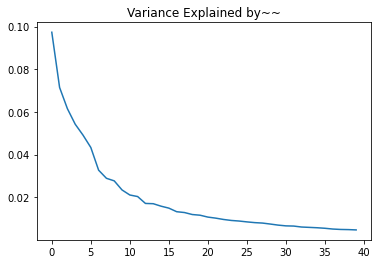

In [10]:
plt.plot(pca.explained_variance_ratio_)
plt.title("Variance Explained by~~")
plt.show()

In [11]:
# transform 해서 내가 fit한 모형에 맞춰야 함(전체를 40으로 만듦.)
# 학습용 데이터를 기반으로 기준을 잡고 잡은 기준을 적용.
train_ext = pca.fit_transform(train_data)
print(train_ext.shape)

(52500, 40)


In [12]:
# train 데이터를 바탕으로 정한 fit기준을 test데이터에 적용해야 함.
# 훈련데이터와 동일한 기준으로 적용해야 함. 
# 이 동일한 기준을 훈련, 실전데이터 모두에 적용해야 함. 

test_ext = pca.transform(test_data)
print(test_ext.shape)



(17500, 40)


KNeighborsClassifier()

In [17]:
knn = KNeighborsClassifier(n_jobs=-1)

In [18]:
cross_val_score(knn, train_ext, train_labels, cv=5)
# 데이터의 크기를 줄였기 때문에 속도가 빨라짐. 성능 좋아짐. 데이터의 밀도 줄임.
# 오리지널 데이터로 하고, feature들로 해봄.

array([0.974     , 0.97380952, 0.97333333, 0.97609524, 0.97609524])

In [ ]:
# 차원을 축소하는 것은(분석용 데이터 관점)
# - 중요한 변수들을 잘 선택하겠다는 것. 
# - 수치적으로만 하는 대표는 PCA
# - dt, rf, xgb,lgbm,.... : tree base소속. 중요한 변수를 알아보기 위한것.
# - 데이터에 대한 지식으로 EDA해야함. 

In [33]:
# 시간 오래 걸림;;;;


array([0.97      , 0.9692381 , 0.96771429, 0.97180952, 0.97066667])

* 위의 기본 세팅에서도 거의 97%의 결과가 나타났는데, PCA로 성분을 줄이면 오히려 더 좋은 성능이나, 적은 데이터로 유사한 성능을 확보할 수 있다.!!!

* 이와 같은 방법을 주로 사용하는 이유는 knn은 상당히 심플하면서도 성능이 좋은 알고리즘인데, 문제를 차원의 저주에 걸리면 상당한 성능저하를 야기하고 있다. 그래서 기본적으로 많은 사람들이 PCA 나 DT 등 여러가지 방법을 활용하여서 ㅏ원 축소를 하고 적용을 하는 경우가 많음!!!!